In [22]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_name, folder_name=None):
    if folder_name != None:
        path = Path("/".join([os.getcwd(), folder_name, file_name]))
    else:
        path = Path("/".join([os.getcwd(), file_name]))
    return pd.read_csv(path)


def plot_histograms(data, target, target_figsize, dependent_layout, dependent_figsize):
    print(f"Distribution of target {target} and dependent variables:")
    data[target].hist(figsize=target_figsize, grid=False).set_title(target)
    # data.iloc[:, [1,2,3,4,5,6,0]].hist(layout=(2,3), figsize=(8,6), sharey=True, grid=False)
    data.drop([target], axis=1).hist(layout=dependent_layout, figsize=dependent_figsize, sharey=True, grid=False)
    plt.tight_layout();

In [23]:
file_name = "term-deposit-marketing-2020.csv"
folder_name = "data"
data = load_data(file_name, folder_name)
print(data.head(), "\n")
print(data.info(), "\n")
data.describe()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object


,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


The data set consists of different data types.<br>

Convert the type of "day" from int64 to object/categorical.

In [24]:
data['day'] = data['day'].astype(str)

Take a look at the distribution of the target variable "y" and dependent variables that are numeric.

Distribution of target y and dependent variables:


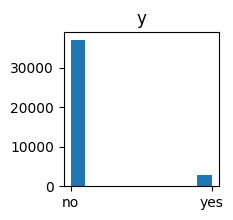

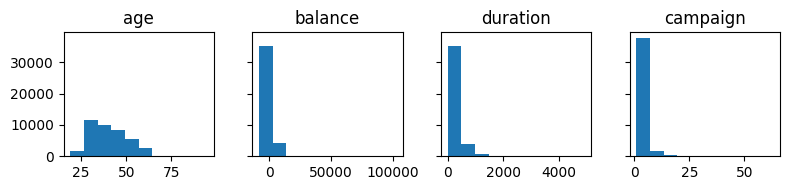

In [36]:
target = data["y"]
plot_histograms(data=data,
                target="y", target_figsize=(2,2),
                dependent_layout=(1,4), dependent_figsize=(8, 2))

The target class is highly imbalanced. SMOTE (synthetic minority oversampling technique) can be used to deal with the class imbalance.<br>
<br>
Numeric variables are highly skewed. Using a log scale or other normalization methods to take into account outliers could be helpful.

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64 

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64 

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64 

no     39191
yes      809
Name: default, dtype: int64 

yes    24031
no     15969
Name: housing, dtype: int64 

no     33070
yes     6930
Name: loan, dtype: int64 

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64 

20    2655
18    2173
21    1914
17    1812
6     1778
5     1691
28    1650
19    1650
14    1636
8     1620
7     1612
29    1600
15    1468
30    1457
9     1374
13    1325
12    1289
11    1272
16    1215
4     1183
2     1109
27     974
26     895
3      874
23

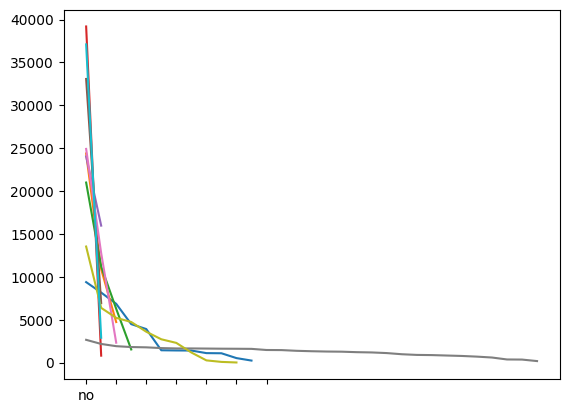

In [42]:
for col in data.columns:
    if type(data[col][0]) == str:
        print(data[col].value_counts(), "\n")

In [38]:
type(data["age"])

pandas.core.series.Series